## EDA (Exploratory Data Analysis)

## Dataset: Top Running Times

1.000 mejores marcas, femeninas y masculinas, de todos los tiempos, en las siguientes 9 pruebas:

100 metros lisos, 200 ml, 400 ml, 800 ml, 1.500 ml, 5.000 ml, 10.000 ml, media Marathon (21.098 m) y Marathon (42.195 m)


Fuente: https://www.kaggle.com/datasets/jguerreiro/running



## Importamos librerías & montamos google drive

In [1]:
# se importan las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import timedelta


# conectamos/montamos la unidad de google drive
from google.colab import drive;
drive.mount('/content/drive/')


Mounted at /content/drive/


## Conociendo y preparando el dataset

### Primer contacto

In [2]:
#cargamos el dataset: leemos el fichero csv y pandas se encarga de transformarlo en dataframe:

df=pd.read_csv('/content/drive/MyDrive/___Esp. IA BigData/Big Data Sistemas/EDA running/running.csv', sep=',', encoding = "utf-8", parse_dates=True)

#un primer vistazo
df

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m
...,...,...,...,...,...,...,...,...,...,...
18239,1000,00:03:33.250000,Noureddine Morceli,ALG,1970-02-28,1.0,Moskva,1995-06-05,Men,1500 m
18240,1000,00:03:33.250000,Paul Korir,KEN,1977-07-15,5.0,Zürich,2003-08-15,Men,1500 m
18241,1000,00:03:33.250000,Hudson Santos de Souza,BRA,1977-02-25,5.0,Rieti,2005-08-28,Men,1500 m
18242,1000,00:03:33.250000,Issac Songok,KEN,1984-04-25,2.0,Stockholm,2006-07-25,Men,1500 m


In [4]:
df.shape

# 10 columnas
# 18244 filas (luego veremos que es porque: 9 pruebas x 2 género x top 1000 = 18000, pero seguramente haya vari@s atletas que compartan mejor marca y también alguna fila repetida)

(18244, 10)

In [5]:
df.info()

# vemos que hay algún nulo en place (posición), luego los trataremos
# además ha cogido esa columna como float en vez de int
# las fechas las ha cogido como object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18244 entries, 0 to 18243
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           18244 non-null  int64  
 1   Time           18244 non-null  object 
 2   Name           18244 non-null  object 
 3   Country        18244 non-null  object 
 4   Date of Birth  18244 non-null  object 
 5   Place          18236 non-null  float64
 6   City           18244 non-null  object 
 7   Date           18244 non-null  object 
 8   Gender         18244 non-null  object 
 9   Event          18244 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


### Primeros cambios: renombramos y colocamos columnas

In [6]:
df.columns

Index(['Rank', 'Time', 'Name', 'Country', 'Date of Birth', 'Place', 'City',
       'Date', 'Gender', 'Event'],
      dtype='object')

In [7]:
#renombramos y ordenamos columnas:

df.rename(columns={'Rank': 'ranking',
                   'Time': 'ev_marca',
                   'Name': 'atleta',
                   'Country': 'at_pais',
                   'Date of Birth': 'at_nacim_fecha',
                   'Place': 'ev_posicion',
                   'City': 'ev_ciudad',
                   'Date': 'ev_fecha',
                   'Gender': 'at_genero',
                   'Event': 'evento'},
          inplace=True)

df = df[['ranking', 'atleta', 'at_pais', 'at_genero', 'at_nacim_fecha', 'evento', 'ev_posicion', 'ev_marca', 'ev_ciudad', 'ev_fecha']]


In [8]:
df.sample(5)

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha
15222,979,Joanne Pavey,GBR,Women,1973-09-20,5000 m,4.0,00:15:01.410000,Göteborg,2006-12-08
5994,908,Christine Wachtel,GER,Women,1965-01-06,800 m,2.0,00:01:58.230000,Neubrandenburg,1989-07-23
12570,337,Titus Mbishei,KEN,Men,1990-10-28,5000 m,7.0,00:13:00.040000,Stockholm,2010-08-06
7973,785,Michael Blackwood,JAM,Men,1976-08-29,400 m,1.0,00:00:44.690000,Columbia,2000-05-21
13106,875,Yenew Alamirew,ETH,Men,1990-05-27,5000 m,3.0,00:13:06.450000,Eugene,2013-06-01


### Tipo y formato de datos

In [9]:

# hemos visto que las fechas las ha cogido como object
# las parseamos a datetime para luego poder ordenar y operar con ellas

df['at_nacim_fecha'] = df['at_nacim_fecha'].astype('datetime64')
df['ev_fecha'] = df['ev_fecha'].astype('datetime64')

df[['at_nacim_fecha','ev_fecha']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18244 entries, 0 to 18243
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   at_nacim_fecha  18244 non-null  datetime64[ns]
 1   ev_fecha        18244 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 285.2 KB


In [10]:
#encontramos 2 formatos de ev_marca en el dataset:
df.sample(7)

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha
3511,512,Jonathan Kipkorir,KEN,Men,1982-12-29,Marathon,7.0,02:07:31,Paris,2009-04-05
5468,382,Nadezhda Olizarenko,UKR,Women,1953-11-28,800 m,1.0,00:01:57.420000,Moskva,1986-08-09
3648,642,Eliud Kiptanui,KEN,Men,1989-06-06,Marathon,5.0,02:07:47,Berlin,2016-09-25
1544,535,Courtney Okolo,USA,Women,1994-03-15,400 m,1.0,00:00:50.030000,Lubbock,2014-05-18
9358,169,Heike Drechsler,GER,Women,1964-12-16,200 m,1.0,00:00:22.080000,Berlin,1988-09-13
7875,705,Innocent Egbunike,NGR,Men,1961-11-30,400 m,1.0,00:00:44.660000,Los Angeles,1985-06-08
7922,734,Christopher Brown,BAH,Men,1978-10-15,400 m,2.0,00:00:44.670000,London,2012-08-05


In [11]:
#pruebas de velocidad, medio fondo y fondo, incluyen los microsegundos %H:%M:%S.%f (ej. 00:00:10.870000)
#marathon y media marathon no incluyen los microsegundos %H:%M:%S (ej. 01:09:29)

#vamos a igualar el formato de los objetos (string) dejando milésimas de segundo

def formatear_tiempo(tiempo):
    if len(tiempo)==12: return tiempo
    elif len(tiempo)==8: return tiempo+'.000'
    else:              return tiempo[:-3]

df['ev_marca']=df['ev_marca'].apply(formatear_tiempo)


In [12]:
#comprobamos

df.sample(7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18244 entries, 0 to 18243
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ranking         18244 non-null  int64         
 1   atleta          18244 non-null  object        
 2   at_pais         18244 non-null  object        
 3   at_genero       18244 non-null  object        
 4   at_nacim_fecha  18244 non-null  datetime64[ns]
 5   evento          18244 non-null  object        
 6   ev_posicion     18236 non-null  float64       
 7   ev_marca        18244 non-null  object        
 8   ev_ciudad       18244 non-null  object        
 9   ev_fecha        18244 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 1.4+ MB


### Tratando filas duplicadas

In [13]:
#tratamiento de filas duplicadas
#cuántas hay?
print(f'Total de filas duplicadas: {df.duplicated().sum()}\n\nMuestra:')
#muestra algunas
df[df.duplicated(keep=False)].head(8)


Total de filas duplicadas: 12

Muestra:


,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha
4327,296,Alexandra Anderson,USA,Women,1987-01-28,100 m,3.0,00:00:10.910,Des Moines,2013-06-21
4328,296,Alexandra Anderson,USA,Women,1987-01-28,100 m,3.0,00:00:10.910,Des Moines,2013-06-21
4590,529,Marie-Josée Ta Lou,CIV,Women,1988-11-18,100 m,1.0,00:00:10.960,London,2016-07-23
4591,529,Marie-Josée Ta Lou,CIV,Women,1988-11-18,100 m,1.0,00:00:10.960,London,2016-07-23
5081,992,English Gardner,USA,Women,1992-04-22,100 m,1.0,00:00:11.020,Birmingham,2016-06-05
5082,992,English Gardner,USA,Women,1992-04-22,100 m,1.0,00:00:11.020,Birmingham,2016-06-05
6236,131,Usain Bolt,JAM,Men,1986-08-21,100 m,1.0,00:00:09.870,London,2015-07-24
6237,131,Usain Bolt,JAM,Men,1986-08-21,100 m,1.0,00:00:09.870,London,2015-07-24


In [14]:
#eliminamos las 12 filas duplicadas

df.drop_duplicates(inplace=True)
print(f'Total de filas duplicadas: {df.duplicated().sum()}')

df.shape

#comprobamos que ha pasado de 18244 a 18232 filas

Total de filas duplicadas: 0


(18232, 10)

###Tratando valores nulos

In [15]:
#trataremos los valores nulos

df.isna().sum()

ranking           0
atleta            0
at_pais           0
at_genero         0
at_nacim_fecha    0
evento            0
ev_posicion       8
ev_marca          0
ev_ciudad         0
ev_fecha          0
dtype: int64

In [16]:
#hay 8 valores nulos en la columna posición
#solo hay 8 nulos y están todos en la misma columna
#y además es un dato poco relevante para nuestro análisis

#podríamos eliminar las filas con nulos por ser pocas (8/18mil)
#podríamos eliminar la columna si no preveemos usarla

#para no perder el resto de datos de esas filas, por si coincide que hay alguno relevante (WR por ejemplo), decidimos rellenar los nulos:

#vemos resumen estádistico de la columna con nulos:
df.ev_posicion.describe()

#son posiciones de carrera, van del 1 al 20

count    18224.000000
mean         2.548178
std          2.156268
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: ev_posicion, dtype: float64

In [17]:
#veamos que filas son las que tienen nulos
    
df[df["ev_posicion"].isnull()]  

# 4 son de los 1500m women de Kiev 1984
# los otros 4 son de otras carreras sueltas

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha
5891,791,Mariya Savinova,RUS,Women,1985-08-13,800 m,NaN,00:01:58.100,Lausanne,2012-08-23
9711,519,Jackie Joyner-Kersee,USA,Women,1962-03-03,200 m,NaN,00:00:22.300,Indianapolis,1988-07-15
10005,788,Dafne Schippers,NED,Women,1992-06-15,200 m,NaN,00:00:22.390,Götzis,2015-05-30
12144,914,Olga Zhuravlyova,RUS,Women,1956-01-01,1500 m,NaN,00:04:02.330,Kiev,1984-06-22
12152,923,Ravilya Agletdinova,BLR,Women,1960-10-02,1500 m,NaN,00:04:02.350,Kiev,1984-06-22
12153,923,Nadezhda Ralldugina,RUS,Women,1957-11-15,1500 m,NaN,00:04:02.350,Kiev,1984-06-22
12158,929,Lyudmila Veselkova,RUS,Women,1950-10-25,1500 m,NaN,00:04:02.370,Kiev,1984-06-22
15078,832,Elvan Abeylegesse,TUR,Women,1982-11-09,5000 m,NaN,00:14:58.790,Beijing,2008-08-19


In [18]:
#veamos las filas de la carrera que tiene 4 valores nulos en posicion

values_1=['Kiev']
values_2=['1984-06-22']
values_3=['1500 m']

filtered_df = df[df.ev_ciudad.isin(values_1) & df.ev_fecha.isin(values_2) & df.evento.isin(values_3)]
filtered_df



,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha
12096,865,Natalya Artyomova,RUS,Women,1963-05-01,1500 m,1.0,00:04:02.200,Kiev,1984-06-22
12144,914,Olga Zhuravlyova,RUS,Women,1956-01-01,1500 m,NaN,00:04:02.330,Kiev,1984-06-22
12152,923,Ravilya Agletdinova,BLR,Women,1960-10-02,1500 m,NaN,00:04:02.350,Kiev,1984-06-22
12153,923,Nadezhda Ralldugina,RUS,Women,1957-11-15,1500 m,NaN,00:04:02.350,Kiev,1984-06-22
12158,929,Lyudmila Veselkova,RUS,Women,1950-10-25,1500 m,NaN,00:04:02.370,Kiev,1984-06-22


In [19]:
# fijandonos en los tiempos podemos rellenar 'a mano' las posiciones que faltan para esa carrera

df.loc[12144,'ev_posicion']=2
df.loc[12152,'ev_posicion']=3
df.loc[12153,'ev_posicion']=3
df.loc[12158,'ev_posicion']=5


filtered_df = df[df.ev_ciudad.isin(values_1) & df.ev_fecha.isin(values_2) & df.evento.isin(values_3)]
filtered_df


,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha
12096,865,Natalya Artyomova,RUS,Women,1963-05-01,1500 m,1.0,00:04:02.200,Kiev,1984-06-22
12144,914,Olga Zhuravlyova,RUS,Women,1956-01-01,1500 m,2.0,00:04:02.330,Kiev,1984-06-22
12152,923,Ravilya Agletdinova,BLR,Women,1960-10-02,1500 m,3.0,00:04:02.350,Kiev,1984-06-22
12153,923,Nadezhda Ralldugina,RUS,Women,1957-11-15,1500 m,3.0,00:04:02.350,Kiev,1984-06-22
12158,929,Lyudmila Veselkova,RUS,Women,1950-10-25,1500 m,5.0,00:04:02.370,Kiev,1984-06-22


In [20]:
df.isna().sum()

ranking           0
atleta            0
at_pais           0
at_genero         0
at_nacim_fecha    0
evento            0
ev_posicion       4
ev_marca          0
ev_ciudad         0
ev_fecha          0
dtype: int64

In [21]:
#para simplificar y probar otra forma de solucionar nulos, veamos el valor medio de esa columna y con él rellenaremos el resto de nulos
round(df.ev_posicion.mean())

3

In [22]:
#rellenamos los nulos con la media
df.ev_posicion.fillna(3, inplace=True)

df.isna().sum()

ranking           0
atleta            0
at_pais           0
at_genero         0
at_nacim_fecha    0
evento            0
ev_posicion       0
ev_marca          0
ev_ciudad         0
ev_fecha          0
dtype: int64

In [23]:
# ya no hay nulos, ahora ya podemos parsear posición de float a int

df['ev_posicion'] = df['ev_posicion'].astype('int64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ranking         18232 non-null  int64         
 1   atleta          18232 non-null  object        
 2   at_pais         18232 non-null  object        
 3   at_genero       18232 non-null  object        
 4   at_nacim_fecha  18232 non-null  datetime64[ns]
 5   evento          18232 non-null  object        
 6   ev_posicion     18232 non-null  int64         
 7   ev_marca        18232 non-null  object        
 8   ev_ciudad       18232 non-null  object        
 9   ev_fecha        18232 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 2.0+ MB


## Añadiendo datos

In [24]:
# vamos a completar el dataframe con nuevos datos para el análisis:
# serán campos calculados

# edad del atleta en el momento de conseguir la marca
# distancia en metros del evento (no vale la categórica que tenemos, que es el nombre del evento aunque aparezca la distancia, debe ser númerica para cálculos posteriores)
# tiempo en segundos (float para poder hacer cálculos)
# ritmo (min/km)
# velocidad (km/hora)

In [25]:
#copia de seg. y vistazo como va el dataframe
df_copiaseg = df.copy()

In [26]:
df_copiaseg.sample(10)
#df.sample(10)

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha
8088,882,Rennie Quow,TTO,Men,1987-08-25,400 m,3,00:00:44.720,Székesfehérvár,2015-07-07
16648,409,Alice Nawowuna,KEN,Women,1994-03-11,"10,000 m",1,00:31:24.180,Brazzaville,2015-09-16
14381,138,Meseret Defar,ETH,Women,1983-11-19,5000 m,1,00:14:37.320,Oslo,2011-09-06
10874,668,Danny Everett,USA,Men,1966-11-01,200 m,1,00:00:20.130,New York City,1991-07-20
15433,190,Catherine N'dereba,KEN,Women,1972-07-21,Marathon,2,02:23:03.000,New York City,2003-11-02
286,283,Hezekiél Sepeng,RSA,Men,1974-06-30,800 m,3,00:01:43.570,Monaco,2001-07-20
371,368,Wilfred Bungei,KEN,Men,1980-07-24,800 m,1,00:01:43.720,Madrid,2004-07-17
11141,929,Frank Fredericks,NAM,Men,1967-10-02,200 m,2,00:00:20.180,Athínai,1997-08-07
819,804,Yuriy Borzakovskiy,RUS,Men,1981-04-12,800 m,8,00:01:44.200,Bruxelles,2002-08-30
9753,541,Carmelita Jeter,USA,Women,1979-11-24,200 m,1,00:00:22.310,Westwood,2012-04-11


### Añadimos columna Edad

In [27]:

# edad en años del atleta en el momento de conseguir la marca

df['ev_edad'] = (df['ev_fecha']-df['at_nacim_fecha']).apply(lambda x: round((x.days/365.2425),1))

df[['ev_edad']].info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ev_edad  18232 non-null  float64
dtypes: float64(1)
memory usage: 800.9 KB


In [28]:
df.ev_edad.nunique()

252

In [29]:
#la edad añadida es float donde la parte decimal corresponde a los meses (0.5 es medio año, 6 meses)
#coservaremos esta columna para tener esa información, pero serán demasiados valores únicos para tratarla como categórica

#así que vamos a calcular también una columna con la edad sin meses para usarla luego como 'categórica'
df['ev_edad_int'] = (df['ev_fecha']-df['at_nacim_fecha']).apply(lambda x: int(round((x.days/365.2425),0)))
df

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int
0,1,David Rudisha,KEN,Men,1988-12-17,800 m,1,00:01:40.910,London,2012-09-08,23.7,24
1,2,David Rudisha,KEN,Men,1988-12-17,800 m,1,00:01:41.010,Rieti,2010-08-29,21.7,22
2,3,David Rudisha,KEN,Men,1988-12-17,800 m,1,00:01:41.090,Berlin,2010-08-22,21.7,22
3,4,Wilson Kipketer,DEN,Men,1970-12-12,800 m,1,00:01:41.110,Köln,1997-08-24,26.7,27
4,5,Wilson Kipketer,DEN,Men,1970-12-12,800 m,1,00:01:41.240,Zürich,1997-08-13,26.7,27
...,...,...,...,...,...,...,...,...,...,...,...,...
18239,1000,Noureddine Morceli,ALG,Men,1970-02-28,1500 m,1,00:03:33.250,Moskva,1995-06-05,25.3,25
18240,1000,Paul Korir,KEN,Men,1977-07-15,1500 m,5,00:03:33.250,Zürich,2003-08-15,26.1,26
18241,1000,Hudson Santos de Souza,BRA,Men,1977-02-25,1500 m,5,00:03:33.250,Rieti,2005-08-28,28.5,29
18242,1000,Issac Songok,KEN,Men,1984-04-25,1500 m,2,00:03:33.250,Stockholm,2006-07-25,22.2,22


In [30]:
df.ev_edad_int.nunique()

#32 es un buena cantidad para hacer tratamiento categórico

32

### Añadimos columna distancia en metros (int)

In [31]:
# distancia en metros de los diferentes eventos

# vemos qué eventos hay
print(f"Categorías en evento: {pd.unique(df['evento'])}")


Categorías en evento: ['800 m' '400 m' '10,000 m' 'Marathon' '100 m' 'Half marathon' '200 m'
 '1500 m' '5000 m']


In [32]:
# AÑADIMOS COLUMNA CON DISTANCIAS EN METROS

# creamos columna de distancia y a cada evento le asignaremos su distancia en metros

df['ev_metros'] = (df['evento'].str[0:-2])

df.loc[df.evento=='10,000 m','ev_metros']       =10000
df.loc[df.evento=='Half marathon','ev_metros']  =21098
df.loc[df.evento=='Marathon','ev_metros']       =42195

df['ev_metros'] = df['ev_metros'].astype('int64')

print(f"Categorías en evento: {pd.unique(df['evento'])}")
print(f"Categorías en distancia: {pd.unique(df['ev_metros'])}")

df[['ev_metros']].info()


Categorías en evento: ['800 m' '400 m' '10,000 m' 'Marathon' '100 m' 'Half marathon' '200 m'
 '1500 m' '5000 m']
Categorías en distancia: [  800   400 10000 42195   100 21098   200  1500  5000]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ev_metros  18232 non-null  int64
dtypes: int64(1)
memory usage: 800.9 KB


### Añadimos tiempo sen segundos (float)

In [33]:
# AÑADIMOS COLUMNA CON TIEMPO EN SEGUNDOS

#el tiempo/marca está como string, añadiremos una columna con segundos (float), para luego poder operar

def marca_a_seg(marca):
    return(datetime.datetime.strptime(marca, "%H:%M:%S.%f") - datetime.datetime(1900, 1, 1)).total_seconds()
    
df['ev_segundos']=df['ev_marca'].apply(marca_a_seg)

df[['ev_segundos']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ev_segundos  18232 non-null  float64
dtypes: float64(1)
memory usage: 800.9 KB


### Añadimos Ritmo en minutos/kilometro

In [34]:
# AÑADIMOS COLUMNA CON RITMO DE CARRERA

df['ev_min_km'] = ((df['ev_segundos']/60) / (df['ev_metros']/1000)).apply(lambda x: round(x,2))

df[['ev_min_km']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ev_min_km  18232 non-null  float64
dtypes: float64(1)
memory usage: 800.9 KB


### Añadimos Velocidad en km/hora

In [35]:
# AÑADIMOS COLUMNA CON VELOCIDAD MEDIA DE CARRERA

df['ev_km_h'] = ((df['ev_metros']/1000) / (df['ev_segundos']/3600)).apply(lambda x: round(x,2))

df[['ev_km_h']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ev_km_h  18232 non-null  float64
dtypes: float64(1)
memory usage: 800.9 KB


### Añadimos año de nacimiento

In [36]:
#vemos que las fechas de nacimiento incluyen mes y día por lo que hay demasiados valores únicos para hacer tratamientos categóricos

df.at_nacim_fecha.nunique()

2669

In [37]:
#df.info()

In [38]:
#haremos una columna con los años de nacimiento, sin meses ni días, con el fin de hacer luego análisis categóricos



def formatear_año(fecha):
    fecha=str(fecha)
    return int(fecha[:4])

df['at_nacim_año']=df['at_nacim_fecha'].apply(formatear_año)


df.at_nacim_año.nunique()


63

In [39]:
df.columns

Index(['ranking', 'atleta', 'at_pais', 'at_genero', 'at_nacim_fecha', 'evento',
       'ev_posicion', 'ev_marca', 'ev_ciudad', 'ev_fecha', 'ev_edad',
       'ev_edad_int', 'ev_metros', 'ev_segundos', 'ev_min_km', 'ev_km_h',
       'at_nacim_año'],
      dtype='object')

In [40]:
#ordenamos las columnas 

df = df[['ranking', 'atleta', 'at_pais', 'at_genero', 'at_nacim_fecha', 'at_nacim_año', 'evento',
       'ev_posicion', 'ev_marca', 'ev_ciudad', 'ev_fecha', 'ev_edad',
       'ev_edad_int', 'ev_metros', 'ev_segundos', 'ev_min_km', 'ev_km_h']]


### Comprobando

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ranking         18232 non-null  int64         
 1   atleta          18232 non-null  object        
 2   at_pais         18232 non-null  object        
 3   at_genero       18232 non-null  object        
 4   at_nacim_fecha  18232 non-null  datetime64[ns]
 5   at_nacim_año    18232 non-null  int64         
 6   evento          18232 non-null  object        
 7   ev_posicion     18232 non-null  int64         
 8   ev_marca        18232 non-null  object        
 9   ev_ciudad       18232 non-null  object        
 10  ev_fecha        18232 non-null  datetime64[ns]
 11  ev_edad         18232 non-null  float64       
 12  ev_edad_int     18232 non-null  int64         
 13  ev_metros       18232 non-null  int64         
 14  ev_segundos     18232 non-null  float64       
 15  ev

In [42]:
df.sample(5)

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
16581,342,Hiromi Suzuki,JPN,Women,1968-12-06,1968,"10,000 m",1,00:31:19.400,Osaka,1996-09-06,27.8,28,10000,1879.40,3.13,19.16
276,275,Vebjørn Rodal,NOR,Men,1972-09-16,1972,800 m,2,00:01:43.560,Zürich,1996-08-14,23.9,24,800,103.56,2.16,27.81
10728,522,Floyd Heard,USA,Men,1966-03-24,1966,200 m,1,00:00:20.090,Houston,1989-06-17,23.2,23,200,20.09,1.67,35.84
15078,832,Elvan Abeylegesse,TUR,Women,1982-11-09,1982,5000 m,3,00:14:58.790,Beijing,2008-08-19,25.8,26,5000,898.79,3.00,20.03
7307,132,Wayde van Niekerk,RSA,Men,1992-07-15,1992,400 m,1,00:00:44.190,Roma,2016-06-02,23.9,24,400,44.19,1.84,32.59


## Revisión del estado del dataframe


- hemos renombrado y ordenado las columnas
- adecuado el formato y tipo de datos de varias columnas
- quitado filas duplicadas
- tratado los valores nulos
- añadido nuevas columnas para el análisis
- etc

Repasemos/comprobemos como está el dataframe:


In [43]:
#tamaño del dataset, filas y columnas
print(f'Filas: {df.shape[0]}')
print(f'Columnas: {df.shape[1]}')

Filas: 18232
Columnas: 17


In [44]:
#filas duplicadas
print(f'Total de filas duplicadas: {df.duplicated().sum()}')

Total de filas duplicadas: 0


In [45]:
#valores nulos
print(f'Total de valores nulos: {df.isna().sum().sum()}')

Total de valores nulos: 0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18232 entries, 0 to 18243
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ranking         18232 non-null  int64         
 1   atleta          18232 non-null  object        
 2   at_pais         18232 non-null  object        
 3   at_genero       18232 non-null  object        
 4   at_nacim_fecha  18232 non-null  datetime64[ns]
 5   at_nacim_año    18232 non-null  int64         
 6   evento          18232 non-null  object        
 7   ev_posicion     18232 non-null  int64         
 8   ev_marca        18232 non-null  object        
 9   ev_ciudad       18232 non-null  object        
 10  ev_fecha        18232 non-null  datetime64[ns]
 11  ev_edad         18232 non-null  float64       
 12  ev_edad_int     18232 non-null  int64         
 13  ev_metros       18232 non-null  int64         
 14  ev_segundos     18232 non-null  float64       
 15  ev

In [47]:
#veamos una muestra
df.sample(12)

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
17507,264,Bethwell Birgen,KEN,Men,1988-08-06,1988,1500 m,3,00:03:31.170,Ad-Dawhah,2012-05-11,23.8,24,1500,211.17,2.35,25.57
15109,865,Natalya Berkut,UKR,Women,1975-05-30,1975,5000 m,1,00:14:59.260,Moskva,2004-12-06,29.5,30,5000,899.26,3.00,20.02
8347,161,Abraham Kiptum,KEN,Men,1989-01-01,1989,Half marathon,6,00:59:36.000,København,2016-09-18,27.7,28,21098,3576.00,2.82,21.24
14289,46,Getenesh Wami,ETH,Women,1974-11-12,1974,5000 m,1,00:14:30.880,Heusden-Zolder,2000-05-08,25.5,25,5000,870.88,2.90,20.67
12768,536,Yenew Alamirew,ETH,Men,1990-05-27,1990,5000 m,4,00:13:02.710,Hengelo,2011-05-29,21.0,21,5000,782.71,2.61,23.00
5448,362,Yelena Afanaseyeva,RUS,Women,1967-03-01,1967,800 m,1,00:01:57.380,Nice,1997-07-16,30.4,30,800,117.38,2.45,24.54
15101,857,Edith Masai,KEN,Women,1967-04-04,1967,5000 m,2,00:14:59.110,Berlin,2004-12-09,37.7,38,5000,899.11,3.00,20.02
3392,392,Mark Korir,KEN,Men,1985-01-10,1985,Marathon,2,02:07:08.000,Seoul,2013-11-03,28.8,29,42195,7628.00,3.01,19.91
3466,465,Yitayal Atnafu Zerihun,ETH,Men,1993-01-20,1993,Marathon,4,02:07:21.000,Paris,2017-04-09,24.2,24,42195,7641.00,3.02,19.88
17709,468,Tarek Boukensa,ALG,Men,1981-11-19,1981,1500 m,3,00:03:31.980,Roma,2008-07-11,26.6,27,1500,211.98,2.36,25.47


In [48]:
#antes de seguir, copia seguridad

df_copiaseg=df.copy()

In [49]:
df.to_csv('/content/drive/MyDrive/___Esp. IA BigData/Big Data Sistemas/EDA running/running_cleaned.csv',index=False)

In [55]:

############## solo ejecutar si se quiere recargar el dtaset desde aquí

df=pd.read_csv('/content/drive/MyDrive/___Esp. IA BigData/Big Data Sistemas/EDA running/running_cleaned.csv', parse_dates=True)

df['at_nacim_fecha'] = df['at_nacim_fecha'].astype('datetime64')
df['ev_fecha'] = df['ev_fecha'].astype('datetime64')

#df


## Primeros análisis inmediatos, corrección de anomalías detectadas (outliers y errores) y primeras conclusiones

In [56]:
#resumen estadístico  de los campos numéricos
df.describe()

,ranking,at_nacim_año,ev_posicion,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
count,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000
mean,500.816202,1977.141071,2.548431,26.013180,26.024901,8925.306659,1649.074233,2.466844,25.664486
std,289.557010,10.896714,2.155891,4.140951,4.142269,13357.944629,2579.464817,0.556470,6.056053
min,1.000000,1900.000000,1.000000,11.500000,12.000000,100.000000,9.580000,1.600000,17.290000
25%,250.000000,1969.000000,1.000000,22.900000,23.000000,400.000000,44.460000,1.860000,20.280000
50%,499.000000,1979.000000,2.000000,25.700000,26.000000,1500.000000,213.040000,2.460000,24.360000
75%,750.000000,1986.000000,3.000000,28.700000,29.000000,10000.000000,1888.007500,2.960000,32.240000
max,1000.000000,1999.000000,20.000000,115.700000,116.000000,42195.000000,8784.000000,3.470000,37.580000


In [57]:
#todo parece en orden menos edad máx. 115 años y edad mín.  11 años
#más que outliers, claramente parecen errores
# veamos a qué dartos corresponden...

df[df['ev_edad']>70]

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
2516,513,Jacob Kiplimo,UGA,Men,1900-11-14,1900,"10,000 m",3,00:27:26.680,Bydgoszcz,2016-07-19,115.7,116,10000,1646.68,2.74,21.86


In [58]:
df[df['ev_edad']<15]


,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
8457,286,Samuel Mwangi,KEN,Men,1997-09-19,1997,Half marathon,4,00:59:55.000,Berlin,2009-04-05,11.5,12,21098,3595.0,2.84,21.13


In [59]:
# Jacob Kiplimo en realidad nación el 14 de nov del 2000, corregimos esa fecha
# Samuel Mwangi en realidad nación el 29 de enero 1983, corregimos esa fecha

df.loc[2516,'at_nacim_fecha']='2000-11-14'
df.loc[8457,'at_nacim_fecha']='1983-01-29'

#al cambiar la fecha nacimiento tendremos que cambiar los campos calculados a paratir de este
# ev_edad	
# ev_edad_int	
# at_nacim_año						

#corregimos la edad el día del evento
df.loc[2516,'ev_edad'] = ((df.loc[2516,'ev_fecha']-df.loc[2516,'at_nacim_fecha']).days/365)
df.loc[8457,'ev_edad'] = ((df.loc[8457,'ev_fecha']-df.loc[8457,'at_nacim_fecha']).days/365)

#corregimos la edad sin meses el día del evento
df.loc[2516,'ev_edad_int'] = int(df.loc[2516,'ev_edad'])
df.loc[8457,'ev_edad_int'] = int(df.loc[8457,'ev_edad'])


#corregimos la edad sin meses el día del evento
df['at_nacim_año']=df['at_nacim_fecha'].apply(formatear_año)

df.describe()



,ranking,at_nacim_año,ev_posicion,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
count,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000,18232.000000
mean,500.816202,1977.145788,2.548431,26.008501,26.020129,8925.306659,1649.074233,2.466844,25.664486
std,289.557010,10.882134,2.155891,4.086629,4.087811,13357.944629,2579.464817,0.556470,6.056053
min,1.000000,1936.000000,1.000000,15.100000,15.000000,100.000000,9.580000,1.600000,17.290000
25%,250.000000,1969.000000,1.000000,22.900000,23.000000,400.000000,44.460000,1.860000,20.280000
50%,499.000000,1979.000000,2.000000,25.700000,26.000000,1500.000000,213.040000,2.460000,24.360000
75%,750.000000,1986.000000,3.000000,28.700000,29.000000,10000.000000,1888.007500,2.960000,32.240000
max,1000.000000,2000.000000,20.000000,66.400000,66.000000,42195.000000,8784.000000,3.470000,37.580000


In [ ]:
# ahora parece todo en orden, pero para hacer un control más 'cientifico' buscaremos si se detectan outliers usando gráficos de 'bigotes'


In [60]:
eventos_list=df.evento.unique()
eventos_list

array(['800 m', '400 m', '10,000 m', 'Marathon', '100 m', 'Half marathon',
       '200 m', '1500 m', '5000 m'], dtype=object)

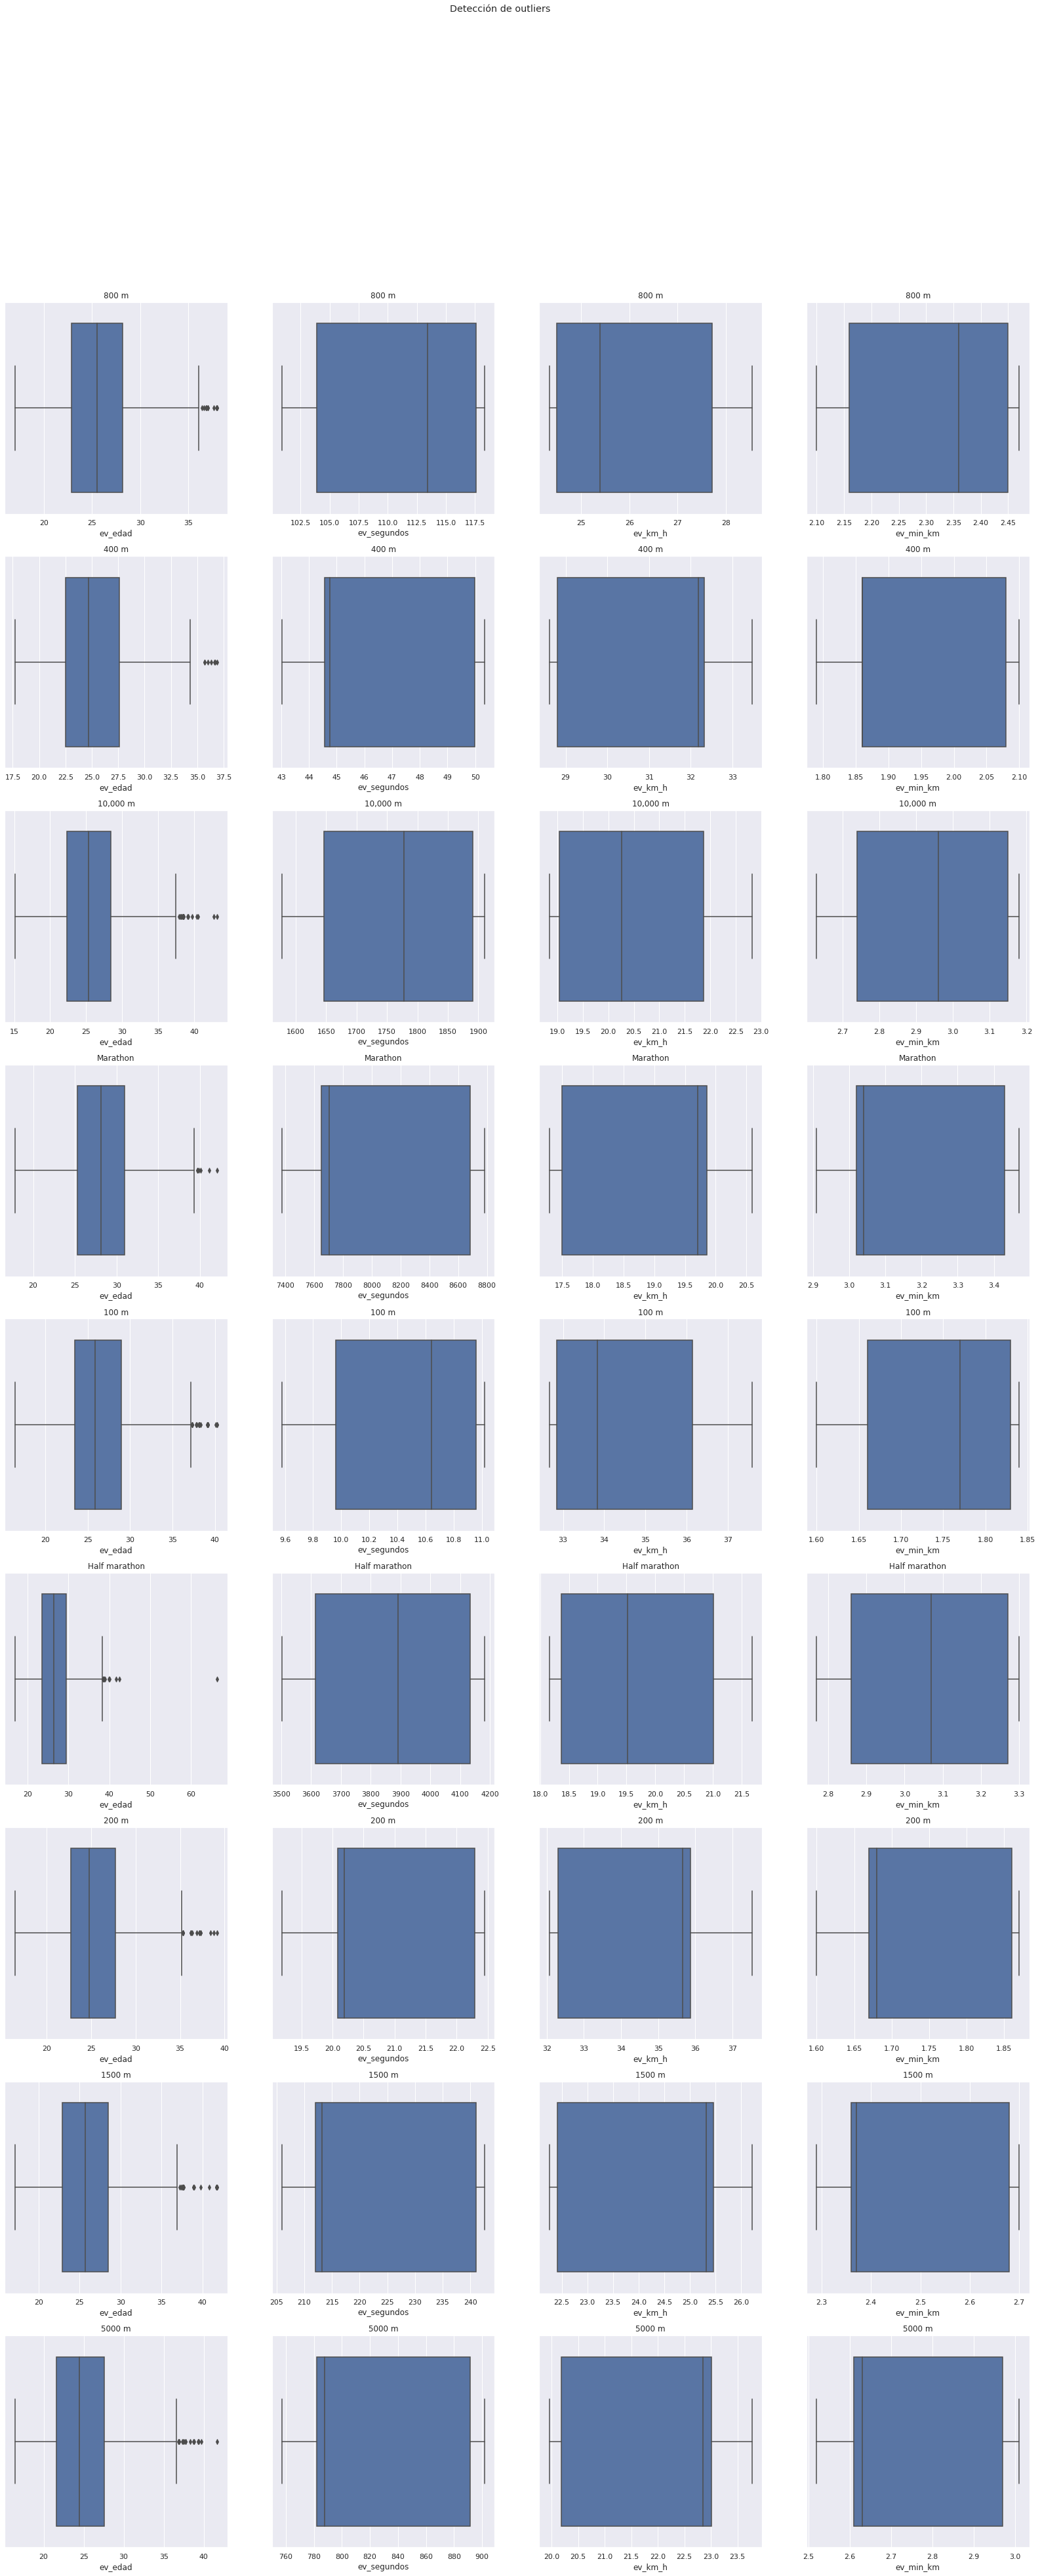

In [61]:
sns.set()
figure, axes = plt.subplots(9,4,figsize=(28,63),sharex=False)
figure.suptitle('Detección de outliers')

# campos susceptibles de contener outliers
campos_list=['ev_edad','ev_segundos','ev_km_h','ev_min_km',]

# tenemos que separar por eventos para poder detectar posibles outliers en cada uno
#eventos_list=['800 m', '400 m', '10,000 m', 'Marathon', '100 m', 'Half marathon',
      # '200 m', '1500 m', '5000 m']


for i in range (len(eventos_list)):
    for j in range (len(campos_list)):
        sns.boxplot(ax=axes[i,j], data=df[df.evento==eventos_list[i]], x=campos_list[j])
        axes[i,j].set_title(eventos_list[i])

Text(0.5, 1.0, 'Half marathon')

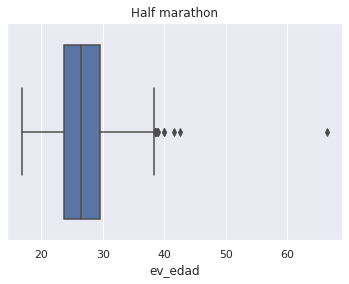

In [62]:
# en los tiempos, ritmo y velocidad no hay outliers en ningún tipo de evento

# en todos los eventos hay outliers en el campo edad por la parte de mayores edades (no hay por la parte de edades menores)
# son outliers que se pueden explicar con atletas que mantuvieron su actividad y consiguieron buenas marcas durante unos pocos años más

# pero en Media Marathon sí hay un claro outlier en el campo edad
# así que simplemente quitaremos esa fila

sns.boxplot( data=df[df.evento=='Half marathon'], x='ev_edad').set_title('Half marathon')



Text(0.5, 1.0, 'Half marathon')

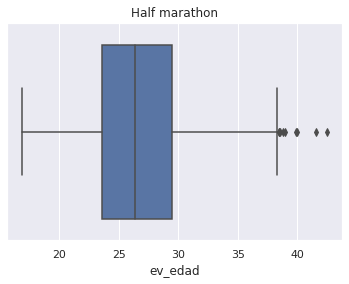

In [63]:
#eliminamos la fila con el outlier

eliminar=df[df["ev_edad"]>60].index
df=df.drop(eliminar)

sns.boxplot( data=df[df.evento=='Half marathon'], x='ev_edad').set_title('Half marathon')


In [64]:
#resumen estadístico campos numéricos

df.describe()

,ranking,at_nacim_año,ev_posicion,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
count,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000,18231.000000
mean,500.798914,1977.148045,2.548407,26.006285,26.017936,8924.638967,1648.936175,2.466799,25.664894
std,289.555542,10.878165,2.155947,4.075777,4.077184,13358.006744,2579.468202,0.556452,6.055968
min,1.000000,1937.000000,1.000000,15.100000,15.000000,100.000000,9.580000,1.600000,17.290000
25%,250.000000,1969.000000,1.000000,22.900000,23.000000,400.000000,44.460000,1.860000,20.280000
50%,499.000000,1979.000000,2.000000,25.700000,26.000000,1500.000000,213.040000,2.460000,24.360000
75%,750.000000,1986.000000,3.000000,28.700000,29.000000,10000.000000,1887.975000,2.960000,32.240000
max,1000.000000,2000.000000,20.000000,43.200000,43.000000,42195.000000,8784.000000,3.470000,37.580000


**Conclusiones:**
- el atleta que con menor edad consiguió una de las 1.000 mejores marcas fue con 15 años
- y con la mayor edad fue 43 años (después de quitar el outlier 66)
- el ritmo más rápido son 1.6 min. por km (será *en* los 100 metros lisos)
- la mayor velocidad media son 37,58 km/h (también tiene que ser en los 100 m lisos)

In [65]:
#resumen estadístico campos categóricos

df.describe(exclude='number')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,atleta,at_pais,at_genero,at_nacim_fecha,evento,ev_marca,ev_ciudad,ev_fecha
count,18231,18231,18231,18231,18231,18231,18231,18231
unique,2902,106,2,2667,9,5997,663,3440
top,Merlene Ottey,KEN,Men,1960-05-10 00:00:00,100 m,00:00:10.000,Zürich,2016-08-13 00:00:00
freq,176,4226,9120,176,2157,119,801,48
first,NaN,NaN,NaN,1937-02-21 00:00:00,NaN,NaN,NaN,1962-03-02 00:00:00
last,NaN,NaN,NaN,2000-11-14 00:00:00,NaN,NaN,NaN,2017-12-03 00:00:00


**Conclusiones:**
- 2.903 atletas a lo largo de la historia se reparten las 18.000 mejores marcas de todos los tiempos (9 pruebas x 2 géneros x top 1.000)
- Marlen Ottey (USA) es la atleta que tiene más mejores marcas, 176
- las mejores marcas se las reparten entre atletas de 106 paises diferentes
- los keniatas tienen 4.226 mejores marcas (casi 1/4 parte)
- el atleta más antiguo que conserva una de las 1.000 mejores marcas en su prueba nació en 1936-11-17
- y el más joven en 2000-11-14
- las mejores marcas se han conseguido en 663 ciudades diferentes
- Zürich (Suiza) es la ciudad en la que más mejores marcas se han logrado 801
- la marca más antigüa entre las 1.000 mejores de cada prueba data de 1962-03-02
- y la más moderna de 2017-12-03 (a fecha del dataset)
- el 2016-08-13 fue el día que más mejejores marcas se registraron: fueron  48

In [67]:
#recuento de valores únicos en cada campo

df.nunique(axis=0)

ranking           1000
atleta            2902
at_pais            106
at_genero            2
at_nacim_fecha    2667
at_nacim_año        62
evento               9
ev_posicion         20
ev_marca          5997
ev_ciudad          663
ev_fecha          3440
ev_edad            250
ev_edad_int         29
ev_metros            9
ev_segundos       5997
ev_min_km          155
ev_km_h           1140
dtype: int64

**Conclusiones:**
- hay atletas nacidos en 63 años diferentes
- las marcas se han conseguido por atletas con 30 edades diferentes

In [66]:
#un primer vistazo a las correlaciones

df.corr()

,ranking,at_nacim_año,ev_posicion,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h
ranking,1.000000,-0.052364,0.180860,0.020193,0.019219,-0.003242,0.002987,0.031354,-0.026484
at_nacim_año,-0.052364,1.000000,0.160645,-0.360659,-0.360903,0.197217,0.188163,0.134878,-0.106300
ev_posicion,0.180860,0.160645,1.000000,0.007976,0.006925,0.112820,0.105714,0.278963,-0.290958
ev_edad,0.020193,-0.360659,0.007976,1.000000,0.997408,0.200220,0.207007,0.149850,-0.124570
ev_edad_int,0.019219,-0.360903,0.006925,0.997408,1.000000,0.196767,0.203685,0.147400,-0.122298
ev_metros,-0.003242,0.197217,0.112820,0.200220,0.196767,1.000000,0.996672,0.735461,-0.660184
ev_segundos,0.002987,0.188163,0.105714,0.207007,0.203685,0.996672,1.000000,0.734783,-0.652422
ev_min_km,0.031354,0.134878,0.278963,0.149850,0.147400,0.735461,0.734783,1.000000,-0.982665
ev_km_h,-0.026484,-0.106300,-0.290958,-0.124570,-0.122298,-0.660184,-0.652422,-0.982665,1.000000


**Conclusiones:**
- correlación muy alta entre la distancia en metros y el tiempo en segundos (está claro que van de la mano)
- la distancia y el tiempo también correlaciona bastante con la velocidad y el ritmo
- el ritmo y la velocidad tienen correlación muy alta entre ellos (también van de la mano)

## Algunos análisis de datos numéricos


In [68]:
# edad media de las mejores marcas, por género

df_gb_at_genero=df.groupby('at_genero')
df_gb_at_genero.ev_edad.agg(['mean','min','max'])


,mean,min,max
at_genero,,,
Men,25.381896,15.687671,41.7
Women,26.631292,15.100000,43.2


Text(0.5, 1.0, 'Distribución de edades')

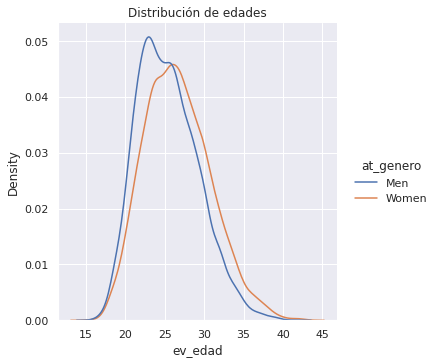

In [71]:
# veámoslo en una gráfico de distribución

sns.displot(data=df, x='ev_edad', hue='at_genero', kind = 'kde')
plt.title('Distribución de edades')

**Conclusión:**

en general las mujeres consiguen sus mejores marcas, de media, un año más mayores que los hombres
- mujeres: 26.63 años
- hombres: 25.38 años



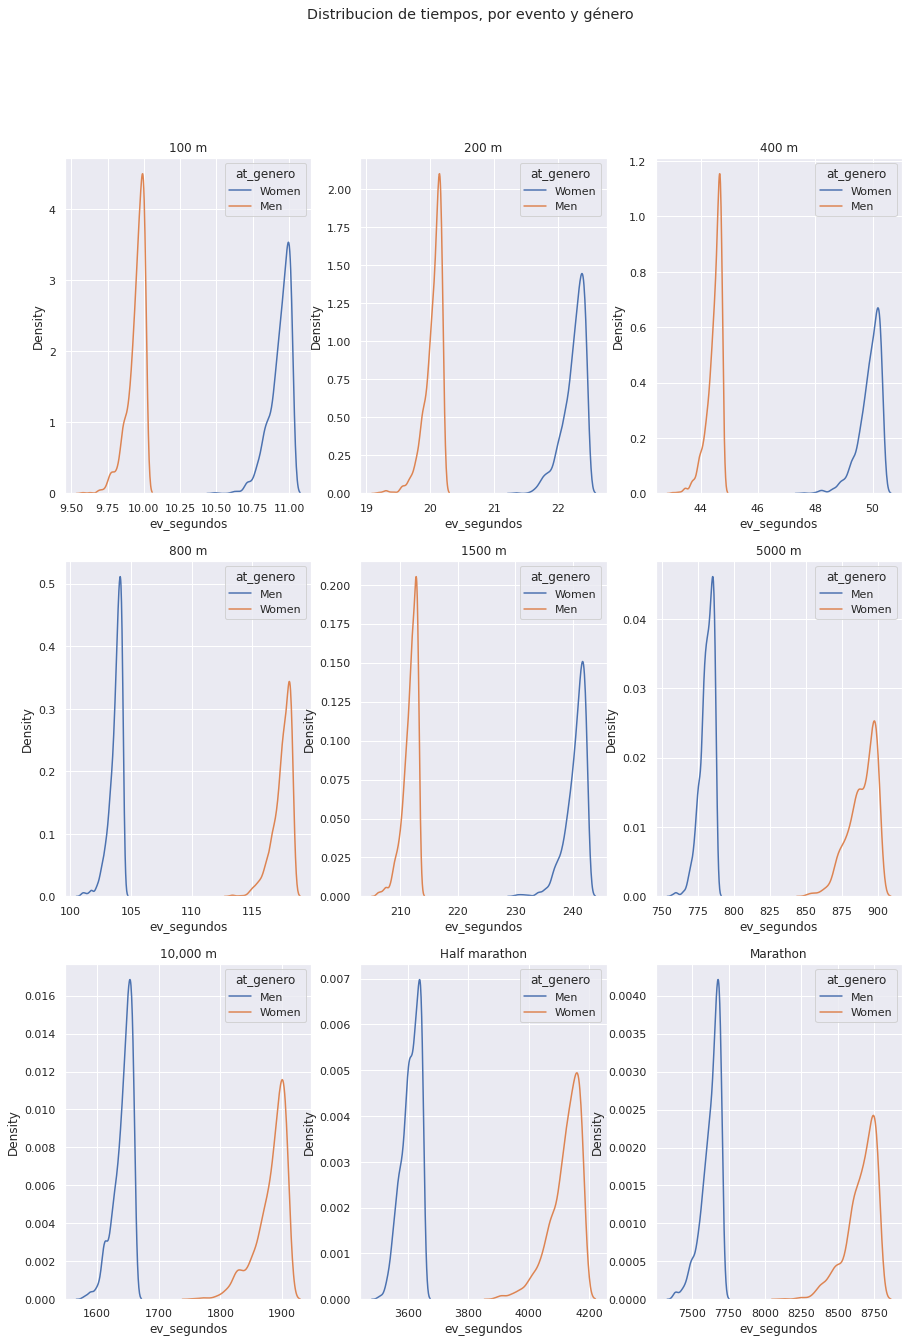

In [ ]:
#veamos la distribución de tiempos en cada evento, separada por géneros

figure, axes = plt.subplots(3,3,figsize=(15,21),sharex=False)
figure.suptitle('Distribucion de tiempos, por evento y género')

velocidad=['100 m', '200 m', '400 m']
medio_fondo=['800 m', '1500 m', '5000 m']
fondo=['10,000 m', 'Half marathon', 'Marathon']

campo='ev_segundos'         # <------------ poner el campo que interese estudiar (edad, ritmo, velocidad)

for i in range (3):
    if i == 0:
        for j in range (len(velocidad)):
            sns.kdeplot(ax=axes[i,j], data=df[df.evento==velocidad[j]], x=campo,  hue='at_genero')
            axes[i,j].set_title(velocidad[j])

    if i == 1:
        for j in range (len(medio_fondo)):
            sns.kdeplot(ax=axes[i,j], data=df[df.evento==medio_fondo[j]], x=campo,  hue='at_genero')
            axes[i,j].set_title(medio_fondo[j])

    if i == 2:
        for j in range (len(fondo)):
            sns.kdeplot(ax=axes[i,j], data=df[df.evento==fondo[j]], x=campo,  hue='at_genero')
            axes[i,j].set_title(fondo[j])

**Conclusión**

Se aprecia claramente la diferencia entre géneros en todos los eventos

In [72]:
# añadimos una nueva columna con el año (en int 64) que fue conseguida cada marca, para estudiar la evolución temporal

df['ev_año']=df['ev_fecha'].dt.year


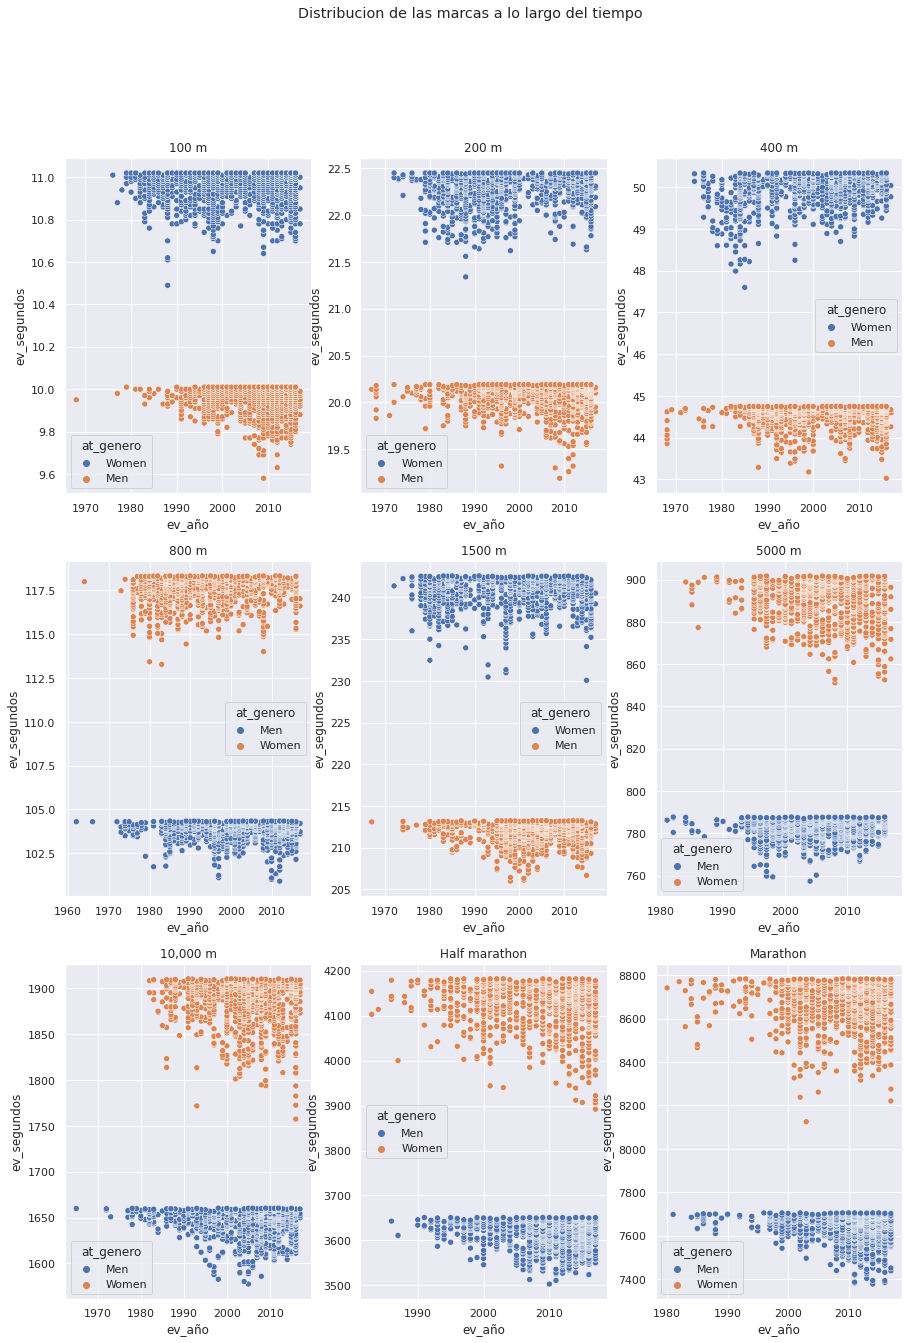

In [73]:
#veamos la distribución/evolución de las marcas a lo largo del tiempo

figure, axes = plt.subplots(3,3,figsize=(15,21),sharex=False)
figure.suptitle('Distribucion de las marcas a lo largo del tiempo')

velocidad=['100 m', '200 m', '400 m']
medio_fondo=['800 m', '1500 m', '5000 m']
fondo=['10,000 m', 'Half marathon', 'Marathon']

for i in range (3):
    if i == 0:
        for j in range (len(velocidad)):
            sns.scatterplot(ax=axes[i,j], data=df[df.evento==velocidad[j]],  x='ev_año', y='ev_segundos',  hue='at_genero')
            axes[i,j].set_title(velocidad[j])

    if i == 1:
        for j in range (len(medio_fondo)):
            sns.scatterplot(ax=axes[i,j], data=df[df.evento==medio_fondo[j]],  x='ev_año', y='ev_segundos',  hue='at_genero')
            axes[i,j].set_title(medio_fondo[j])

    if i == 2:
        for j in range (len(fondo)):
            sns.scatterplot(ax=axes[i,j], data=df[df.evento==fondo[j]],  x='ev_año', y='ev_segundos',  hue='at_genero')
            axes[i,j].set_title(fondo[j])

**Conclusión:**

Parece que de momento sí hay una tendencia a que las marcas van mejorando poco a poco a lo largo de los años... (llegarán a un límite que ya no se puedan mejorar)

<Figure size 1440x360 with 0 Axes>

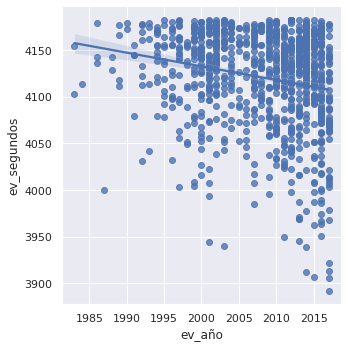

In [74]:
# veamos algun evento aplicando regresión lineal


plt.figure(figsize=(20,5))


values_1=['Women']
values_2=['Half marathon']

df_filtrado = df[df.at_genero.isin(values_1) & df.evento.isin(values_2)]

sns.lmplot(x="ev_año", y="ev_segundos", data=df_filtrado)



**Conclusión:**
otros eventos no se ve tan claro, pero en el caso de la media marathon femenina está clara la evolución de mejora de las marcas en el tiempo

## Algunos análisis de datos categóricos

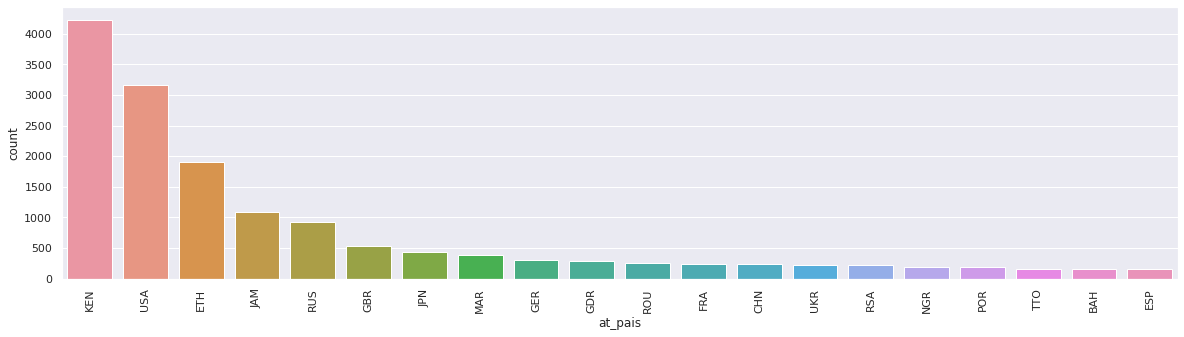

KEN    4226
USA    3170
ETH    1908
JAM    1092
RUS     928
GBR     528
JPN     440
MAR     380
GER     306
GDR     281
ROU     260
FRA     245
CHN     235
UKR     227
RSA     219
NGR     187
POR     186
TTO     166
BAH     158
ESP     155
Name: at_pais, dtype: int64

In [78]:
# veamos que paises aportan más mejores marcas
fig = plt.figure(1, (20, 5))


ax1 = plt.subplot(1,1,1)
sns.countplot(data=df,x='at_pais', order=df['at_pais'].value_counts().index[:20])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.show()

df.at_pais.value_counts()[:20]


In [96]:
df_pais=df[df.at_pais=='KEN']
print(f'KEN:\n{df_pais.evento.value_counts()[:4]}')

df_pais=df[df.at_pais=='USA']
print(f'\nUSA:\n{df_pais.evento.value_counts()[:4]}')

df_pais=df[df.at_pais=='ETH']
print(f'\nETH:\n{df_pais.evento.value_counts()[:4]}')

df_pais=df[df.at_pais=='JAM']
print(f'\nJAM:\n{df_pais.evento.value_counts()[:4]}')

KEN:
Half marathon    1126
5000 m            808
Marathon          798
10,000 m          591
Name: evento, dtype: int64

USA:
200 m    884
100 m    851
400 m    795
800 m    170
Name: evento, dtype: int64

ETH:
5000 m           560
Marathon         537
Half marathon    359
10,000 m         335
Name: evento, dtype: int64

JAM:
100 m    561
200 m    359
400 m    163
800 m      8
Name: evento, dtype: int64


**Conclusión**

Destacan:

Kenia y Etiopía, por sus fondistas

USA y Jamaica, por sus velocistas

(En principio parece que se puede deducir todos de raza negra)

(Estaría bien comparar con la población que tiene cada país)

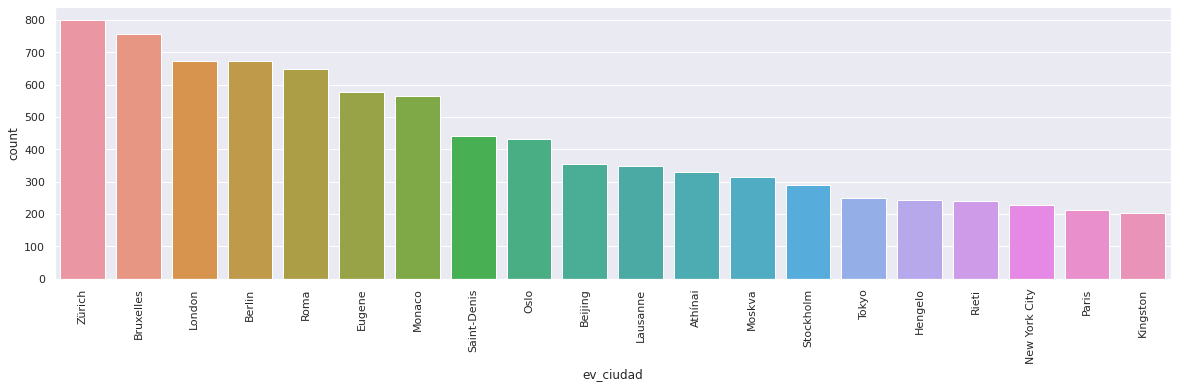

Zürich           801
Bruxelles        758
London           674
Berlin           674
Roma             649
Eugene           578
Monaco           565
Saint-Denis      442
Oslo             433
Beijing          354
Lausanne         347
Athínai          329
Moskva           314
Stockholm        291
Tokyo            249
Hengelo          244
Rieti            241
New York City    229
Paris            211
Kingston         204
Name: ev_ciudad, dtype: int64


In [95]:
# veamos ahora en que ciudades se han consiguido más mejores marcas
fig = plt.figure(1, (20, 5))

ax1 = plt.subplot(1,1,1)
sns.countplot(data=df,x='ev_ciudad', order=df['ev_ciudad'].value_counts().index[:20])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.show()

print(df.ev_ciudad.value_counts()[:20])

**Conclusión**

Las primeras, todas grandes ciudades europeas

(Estaría bien buscar alguna relación con la altitud, distancia a la costa, etc)

## Correlación

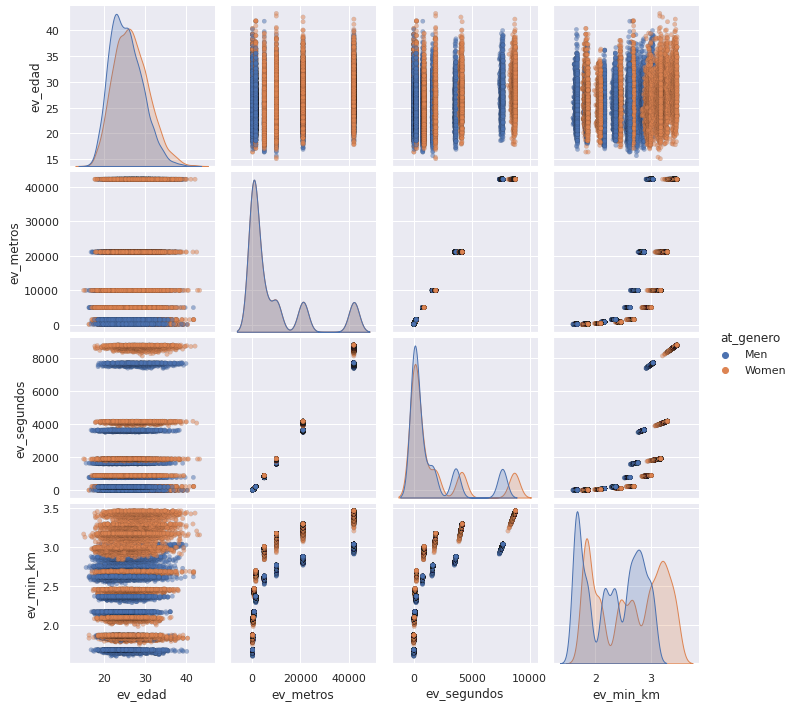

In [98]:
# haremos un multiplot con las correlaciones de algunos campos para un primer análisis visual de las mismas

# vars=['at_nacim_año','ev_edad','ev_metros','ev_segundos','ev_min_km','ev_km_h','ev_año']

sns.pairplot(data=df, vars=['ev_edad','ev_metros','ev_segundos','ev_min_km'], diag_kind='kde', hue='at_genero',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()

**Conclusiones**
- visualmente se ve la correlación **lineal** entre la distancia del evento y el tiempo, que es una clara correlación de causalidad (cuanto mayor es la distancia más tiempo se tarda en recorrer)
- a su vez estas dos variables correlacionas fuertemente entre ellas, tienen una correlación **polinómica** con la velocidad y el ritmo, que también tiene una clara componente de causalidad (cuanto menor sea la distancia se puede manter mantener un ritmo más alto)
- no parece haber otras correlaciones visualmente claras

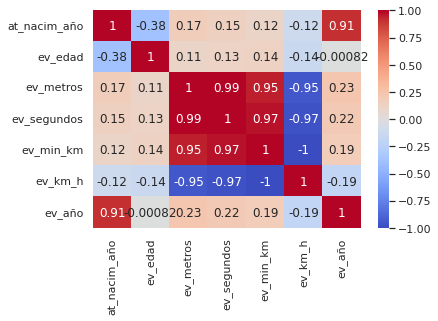

In [ ]:
# veamos ahora las correlaciones de forma numérica

#incluimos mas variables
df_num=df[['at_nacim_año','ev_edad','ev_metros','ev_segundos','ev_min_km','ev_km_h','ev_año']]

sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

**Conclusiones**
- Se comprueban las correlaciones:
- distancia-tiempo
- ritmo-velocidad (en el fondo es lo mismo expresado de dos formas diferentes)
- distancia-tiempo con ritmo-velocidad
- el año de nacimiento del atleta con los años de celebración de los eventos en los que consigue sus mejores marcas
- una pequeña correlación (0.38) entre el año de nacimiento de los atletas y las edades a las que consiguen sus mejores marcas 

<Figure size 1440x360 with 0 Axes>

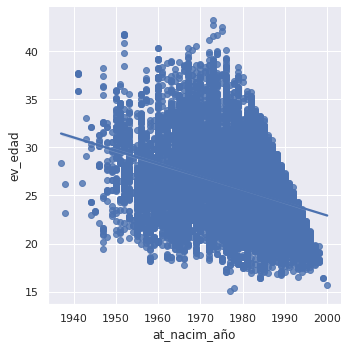

In [105]:
# comprobemos la correlación (0.38) entre el año de nacimiento de los atletas y las edades a las que consiguen sus mejores marcas

plt.figure(figsize=(20,5))
sns.lmplot(x="at_nacim_año", y="ev_edad", data=df)


**Conclusión**

parece que efectivamente los atletas nacidos más recientemente consiguen sus mejores marcas siendo más jóvenes

## Otros datos numéricos


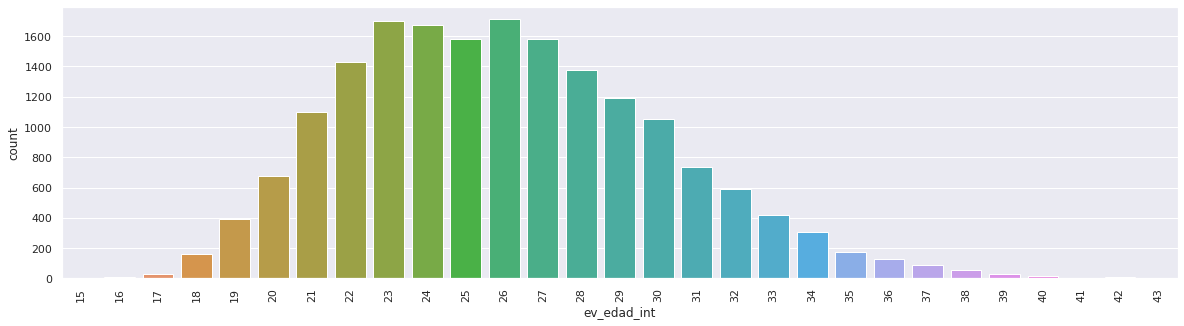

Edades con mejores marcas por orden:
26    1711
23    1698
24    1672
25    1581
27    1580
22    1431
28    1379
Name: ev_edad_int, dtype: int64


In [131]:
# cuáles son las mejores edades para hacer mejores marcas

fig = plt.figure(1, (20, 5))

ax1 = plt.subplot(1,1,1)
sns.countplot(data=df,x='ev_edad_int')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.show()

print('Edades con mejores marcas por orden:')
print(df.ev_edad_int.value_counts()[:7])

**Conclusión**

- Entre los 22 y los 28 años estás en las mejores edades para hacer tus mejores marcas



In [145]:
#vamos a agrupar los eventos en 3 tipos en función de la distancia: velocidad, medio fondo y fondo

#group ages and year together
def group_distanacias(dist):
    if dist <= 400:
        return "velocidad"
    elif dist >= 10000:
        return "fondo"
    else:
        return "medio fondo"
    

df2=df.copy()
df2["ev_tipo"] = df2["ev_metros"].apply(group_distanacias)
df2.sample(5)

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h,ev_año,ev_tipo
15485,252,Feyse Tadese,ETH,Women,1988-11-19,1988,Marathon,1,02:23:26.000,Seoul,2012-03-18,23.3,23,42195,8606.00,3.40,17.65,2012,fondo
4605,596,Gwen Torrence,USA,Women,1965-06-12,1965,100 m,1,00:00:10.970,New Orleans,1992-06-20,27.0,27,100,10.97,1.83,32.82,1992,velocidad
11526,307,Irina Lishchinskaya,UKR,Women,1976-01-15,1976,1500 m,3,00:04:00.040,Athínai,2006-07-03,30.5,30,1500,240.04,2.67,22.50,2006,medio fondo
9541,346,Allyson Felix,USA,Women,1985-11-18,1985,200 m,2,00:00:22.220,Bruxelles,2015-09-08,29.8,30,200,22.22,1.85,32.40,2015,velocidad
7449,285,Machel Cedenio,TTO,Men,1995-06-09,1995,400 m,1,00:00:44.390,Rio de Janeiro,2016-08-13,21.2,21,400,44.39,1.85,32.44,2016,velocidad


In [144]:
#veamos la media de edades de las mejores marcas por tipo de evento

df2.groupby('ev_tipo').mean().ev_edad

ev_tipo
fondo          26.855069
medio fondo    25.521361
velocidad      25.655189
Name: ev_edad, dtype: float64

**Conclusión:**

- las mejores marcas en velocidad y medio fondo se consiguen hacia los 25 años y medio de media
- y las mejores marcas en fondo hacia los 26 años y 10 meses

In [147]:
# para probar como filtrar por varios campos

# vamos a consultar por ejemplo cuál es la mejor edad media, por género, para hecer mejor marca en cada evento

filtro_1='at_genero'
valor_1='Men'           # <-------------- elegir género

filtro_2='evento'
valor_2='800 m'           # <-------------- elegir evento

df_filtrado = df[df[filtro_1].isin([valor_1]) & df[filtro_2].isin([valor_2])].ev_edad.mean()

print(f'Mejor edad para hacer mejor marca en {valor_2} {valor_1}:\n')
df_filtrado

Mejor edad para hacer mejor marca en 800 m Men:



24.898900000000015


**RECORDS MUNDIALES**

In [139]:
# Records mundiales FEMENINOS

df_records=df[df.ranking==1]
df_records[df_records.at_genero=='Women'].sort_values('ev_metros')

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h,ev_año
4000,1,Florence Griffith-Joyner,USA,Women,1959-12-21,1959,100 m,1,00:00:10.490,Indianapolis,1988-07-16,28.6,29,100,10.49,1.75,34.32,1988
9180,1,Florence Griffith-Joyner,USA,Women,1959-12-21,1959,200 m,1,00:00:21.340,Seoul,1988-09-29,28.8,29,200,21.34,1.78,33.74,1988
1000,1,Marita Koch,GDR,Women,1957-02-18,1957,400 m,1,00:00:47.600,Canberra,1985-06-10,28.3,28,400,47.60,1.98,30.25,1985
5082,1,Jarmila Kratochvílová,CZE,Women,1951-01-26,1951,800 m,1,00:01:53.280,München,1983-07-26,32.5,32,800,113.28,2.36,25.42,1983
11219,1,Genzebe Dibaba,ETH,Women,1991-08-02,1991,1500 m,1,00:03:50.070,Monaco,2015-07-17,24.0,24,1500,230.07,2.56,23.47,2015
14232,1,Tirunesh Dibaba,ETH,Women,1985-01-06,1985,5000 m,1,00:14:11.150,Oslo,2008-06-06,23.4,23,5000,851.15,2.84,21.15,2008
16228,1,Almaz Ayana,ETH,Women,1991-11-21,1991,"10,000 m",1,00:29:17.450,Rio de Janeiro,2016-12-08,25.0,25,10000,1757.45,2.93,20.48,2016
13223,1,Joyciline Jepkosgei,KEN,Women,1993-08-12,1993,Half marathon,1,01:04:52.000,Praha,2017-01-04,23.4,23,21098,3892.00,3.07,19.52,2017
15232,1,Paula Radcliffe,GBR,Women,1973-12-17,1973,Marathon,1,02:15:25.000,London,2003-04-13,29.3,29,42195,8125.00,3.21,18.70,2003


In [138]:
# Records mundiales MASCULINOS

df_records=df[df.ranking==1]
df_records[df_records.at_genero=='Men'].sort_values('ev_metros')

,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h,ev_año
6085,1,Usain Bolt,JAM,Men,1986-08-21,1986,100 m,1,00:00:09.580,Berlin,2009-08-16,23.0,23,100,9.58,1.60,37.58,2009
10193,1,Usain Bolt,JAM,Men,1986-08-21,1986,200 m,1,00:00:19.190,Berlin,2009-08-20,23.0,23,200,19.19,1.60,37.52,2009
7160,1,Wayde van Niekerk,RSA,Men,1992-07-15,1992,400 m,1,00:00:43.030,Rio de Janeiro,2016-08-14,24.1,24,400,43.03,1.79,33.47,2016
0,1,David Rudisha,KEN,Men,1988-12-17,1988,800 m,1,00:01:40.910,London,2012-09-08,23.7,24,800,100.91,2.10,28.54,2012
17228,1,Hicham El Guerrouj,MAR,Men,1974-09-14,1974,1500 m,1,00:03:26.000,Roma,1998-07-14,23.8,24,1500,206.00,2.29,26.21,1998
12221,1,Kenenisa Bekele,ETH,Men,1982-06-13,1982,5000 m,1,00:12:37.350,Hengelo,2004-05-31,22.0,22,5000,757.35,2.52,23.77,2004
2007,1,Kenenisa Bekele,ETH,Men,1982-06-13,1982,"10,000 m",1,00:26:17.530,Bruxelles,2005-08-26,23.2,23,10000,1577.53,2.63,22.82,2005
8172,1,Zersenay Tadese,ERI,Men,1982-08-02,1982,Half marathon,1,00:58:23.000,Lisboa,2010-03-21,27.6,28,21098,3503.00,2.77,21.68,2010
3001,1,Dennis Kimetto,KEN,Men,1984-04-22,1984,Marathon,1,02:02:57.000,Berlin,2014-09-28,30.4,30,42195,7377.00,2.91,20.59,2014


In [140]:
# para consultar mejores marcas por evento y género

filtro_1='at_genero'
valor_1='Men'           # <-------------- elegir género

filtro_2='evento'
valor_2='100 m'           # <-------------- elegir evento

df_filtrado = df[df[filtro_1].isin([valor_1]) & df[filtro_2].isin([valor_2])].sort_values('ev_segundos')[:5] # <-------------- elegir cuantas quieres ver

print(f'Datos de la mejor marca en {valor_2} {valor_1}:\n')
df_filtrado

Datos de la mejor marca en 100 m Men:



,ranking,atleta,at_pais,at_genero,at_nacim_fecha,at_nacim_año,evento,ev_posicion,ev_marca,ev_ciudad,ev_fecha,ev_edad,ev_edad_int,ev_metros,ev_segundos,ev_min_km,ev_km_h,ev_año
6085,1,Usain Bolt,JAM,Men,1986-08-21,1986,100 m,1,00:00:09.580,Berlin,2009-08-16,23.0,23,100,9.58,1.60,37.58,2009
6086,2,Usain Bolt,JAM,Men,1986-08-21,1986,100 m,1,00:00:09.630,London,2012-08-05,26.0,26,100,9.63,1.60,37.38,2012
6087,3,Usain Bolt,JAM,Men,1986-08-21,1986,100 m,1,00:00:09.690,Beijing,2008-08-16,22.0,22,100,9.69,1.61,37.15,2008
6088,3,Tyson Gay,USA,Men,1982-08-09,1982,100 m,1,00:00:09.690,Shanghai,2009-09-20,27.1,27,100,9.69,1.61,37.15,2009
6089,3,Yohan Blake,JAM,Men,1989-12-26,1989,100 m,1,00:00:09.690,Lausanne,2012-08-23,22.7,23,100,9.69,1.61,37.15,2012


In [ ]:
###############################################################################################################

In [163]:
# cuál es el ritmo medio de 5000 m del dataframe

ritmo_5k = df[df.evento=='5000 m'].ev_min_km.mean()

ritmo_5k_min = int(ritmo_5k)
ritmo_5k_sec= round(((ritmo_5k-ritmo_5k_min)*60),2)

ritmo_5k_str = str(ritmo_5k_min) + ':' + str(ritmo_5k_sec) + ' min/km'

ritmo_5k_str

'2:47.04 min/km'

In [164]:
# una curiosidad para finalizar
# vamos a añadir al df mi mejor registro personal en 5000 m con un ritmo de 3:55 min/km

df_yo = df.copy()

df_yo=df_yo.append({'ranking':1001,
              'atleta':'Manolito D-M',
              'at_pais':'ESP',
              'at_genero':'Men',
              'at_nacim_fecha':'1974-01-12',
              'at_nacim_año':1974,
              'evento':'5000 m',
              'ev_posicion':20,
              'ev_marca':'00:19:35.000',
              'ev_ciudad':'Coruña',
              'ev_fecha':'2017-05-18', 
              'ev_edad':43.3,
              'ev_edad_int':43,
              'ev_metros':5000,
              'ev_segundos':1175,
              'ev_min_km':3.92,
              'ev_km_h':15.30} , ignore_index=True)


Text(0.5, 1.0, '5000 m')

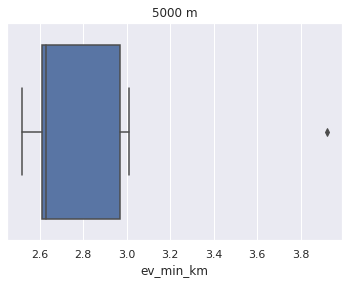

In [165]:
# veamos como soy de outlier
sns.boxplot( data=df_yo[df_yo.evento=='5000 m'], x='ev_min_km').set_title('5000 m')

# me lo temía!!! soy muuuy outlier :-)